# StockX

* **Data:** `StockX-Data-Contest-2019-3.xlsx`
* **Description:** You can buy shoes and resell them later online for more money. Wild world, right? This data is from [StockX](https://stockx.com/)
* **Source:** https://stockx.com/news/the-2019-data-contest/
* **Columns of interest:**
    * `Order Date` is the resale order was completed
    * `Brand` is the name of the company producing the shoe
    * `Sneaker Name` is the name of the shoe itself
    * `Sale Price` is how much the shoe went for at resale
    * `Retail Price` is how much the shoe originally cost
    * `Release Date` is when the shoe was originally released
    * `Shoe Size` is the size of the shoe being sold
    * `Buyer Region` is where the shoe's buyer is located

## Read in your data

This Excel file has multiple sheets in it! You'll need to specify the sheet when you read it in with `sheet_name='Raw Data'`.

In [1]:
# %load ../pandas.py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('../data/StockX-Data-Contest-2019-3.xlsx', sheet_name='Raw Data')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"1,097.00",220,2016-09-24,11.00,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.00,220,2016-11-23,11.00,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.00,220,2016-11-23,11.00,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"1,075.00",220,2016-11-23,11.50,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.00,220,2017-02-11,11.00,Rhode Island


## What brand had more sales?

Yes, there are only two of them.

In [3]:
df['Brand'].value_counts()

df['Brand'].value_counts(normalize=True)

 Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64

 Yeezy      0.72
Off-White   0.28
Name: Brand, dtype: float64

## What's the most common shoe size sold?

I'd like you to write a sentence like `Size ____ is the most common shoe size sold, capturing ___ percent of the market.`

In [4]:
df['Shoe Size'].value_counts(normalize=True).head(3)*100

10.00   11.10
9.00     9.71
11.00    9.26
Name: Shoe Size, dtype: float64

[Text(0, 0, '10.0'),
 Text(1, 0, '9.0'),
 Text(2, 0, '11.0'),
 Text(3, 0, '10.5'),
 Text(4, 0, '9.5'),
 Text(5, 0, '12.0'),
 Text(6, 0, '8.0'),
 Text(7, 0, '8.5'),
 Text(8, 0, '13.0'),
 Text(9, 0, '11.5'),
 Text(10, 0, '6.0'),
 Text(11, 0, '7.0'),
 Text(12, 0, '5.0'),
 Text(13, 0, '7.5'),
 Text(14, 0, '5.5'),
 Text(15, 0, '4.0'),
 Text(16, 0, '6.5'),
 Text(17, 0, '14.0'),
 Text(18, 0, '4.5'),
 Text(19, 0, '12.5'),
 Text(20, 0, '13.5'),
 Text(21, 0, '15.0'),
 Text(22, 0, '14.5'),
 Text(23, 0, '16.0'),
 Text(24, 0, '17.0'),
 Text(25, 0, '3.5')]

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12])

[Text(0, 0.0, ' 0.00'),
 Text(0, 0.02, ' 2.00'),
 Text(0, 0.04, ' 4.00'),
 Text(0, 0.06, ' 6.00'),
 Text(0, 0.08, ' 8.00'),
 Text(0, 0.1, ' 10.00'),
 Text(0, 0.12, ' 12.00')]

Text(0, 0.5, 'Percentage of Shoes Sold')

Text(0.5, 0, 'Shoe Size')

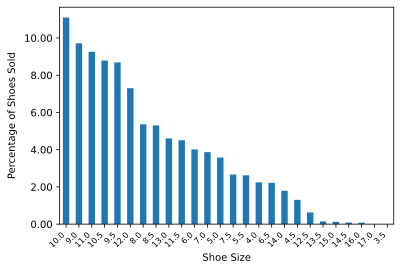

In [5]:
ax=plt.subplot()
ax=df['Shoe Size'].value_counts(normalize=True).plot(kind='bar')
labels=ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
ax.get_yticks()
ylabels=[f'{label*100: .2f}'for label in ax.get_yticks()]
ax.set_yticklabels(ylabels)
ax.set_ylabel('Percentage of Shoes Sold')
ax.set_xlabel('Shoe Size')

<h3> Size 10 is the most commone shoe size sold, captureing 11% of the market</h3>

## What was the median difference between the sale price and the retail price?

In [6]:
df['Profit']=df['Sale Price'] - df['Retail Price']

df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"1,097.00",220,2016-09-24,11.00,California,877.00
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.00,220,2016-11-23,11.00,California,465.00
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.00,220,2016-11-23,11.00,California,470.00
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"1,075.00",220,2016-11-23,11.50,Kentucky,855.00
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.00,220,2017-02-11,11.00,Rhode Island,608.00


In [7]:
df['Profit'].median()

154.0

## What were the total sales (in dollars) to South Dakota, New Mexico, and Vermont?

In [8]:
df[(df['Buyer Region']=='South Dakota') | 
   (df['Buyer Region']=='New Mexico') |  
   (df['Buyer Region']=='Vermont')]['Sale Price'].sum()

157718.0

In [9]:
regions=['South Dakota', 'New Mexico', 'Vermont']

df[df['Buyer Region'].isin(regions)]['Sale Price'].sum()

157718.0

## What were the total sales (in dollars) of shoes sized 5, 6 and 7?

In [10]:
df[df['Shoe Size'].isin([5, 6, 7])]['Sale Price'].sum()

4686479.71

## What sneakers sold, on average, for the highest sale price?

In [11]:
df.groupby(['Sneaker Name'])['Sale Price'].mean().sort_values(ascending=False)

Sneaker Name
Air-Jordan-1-Retro-High-Off-White-White             1,826.07
Air-Jordan-1-Retro-High-Off-White-Chicago           1,769.80
Adidas-Yeezy-Boost-350-Low-Turtledove               1,531.66
Nike-Air-Presto-Off-White                           1,236.06
Adidas-Yeezy-Boost-350-Low-Oxford-Tan               1,011.51
Adidas-Yeezy-Boost-350-Low-Moonrock                   996.71
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016          984.24
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100     975.52
Adidas-Yeezy-Boost-350-V2-Core-Black-Red              937.75
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015          895.09
Nike-Air-Max-97-Off-White-Elemental-Rose-Queen        893.78
Nike-Air-VaporMax-Off-White                           856.68
Air-Jordan-1-Retro-High-Off-White-University-Blue     850.85
Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017         804.30
Adidas-Yeezy-Boost-350-Low-V2-Beluga                  788.70
Nike-Blazer-Mid-Off-White-Wolf-Grey                   784.82
Nike-Air-Ma

<AxesSubplot:ylabel='Sneaker Name'>

[Text(0, 0, 'Adidas-Yeezy-Boost-350-V2-Sesame'),
 Text(0, 1, 'adidas-Yeezy-Boost-350-V2-Butter'),
 Text(0, 2, 'Nike-Zoom-Fly-Off-White-Pink'),
 Text(0, 3, 'adidas-Yeezy-Boost-350-V2-Static'),
 Text(0, 4, 'Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange'),
 Text(0, 5, 'Adidas-Yeezy-Boost-350-V2-Cream-White'),
 Text(0, 6, 'Nike-Zoom-Fly-Off-White-Black-Silver'),
 Text(0, 7, 'Nike-Zoom-Fly-Mercurial-Off-White-Black'),
 Text(0, 8, 'Adidas-Yeezy-Boost-350-V2-Zebra'),
 Text(0, 9, 'Adidas-Yeezy-Boost-350-V2-Blue-Tint'),
 Text(0, 10, 'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow'),
 Text(0, 11, 'Nike-Air-Force-1-Low-Off-White-Volt'),
 Text(0, 12, 'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0'),
 Text(0, 13, 'adidas-Yeezy-Boost-350-V2-Static-Reflective'),
 Text(0, 14, 'Nike-React-Hyperdunk-2017-Flyknit-Off-White'),
 Text(0, 15, 'Nike-Air-Force-1-Low-Off-White-Black-White'),
 Text(0, 16, 'Nike-Blazer-Mid-Off-White-Grim-Reaper'),
 Text(0, 17, 'Nike-Air-Max-90-Off-White-Desert-Ore'),
 Text(0, 18, 'Nike-Zo

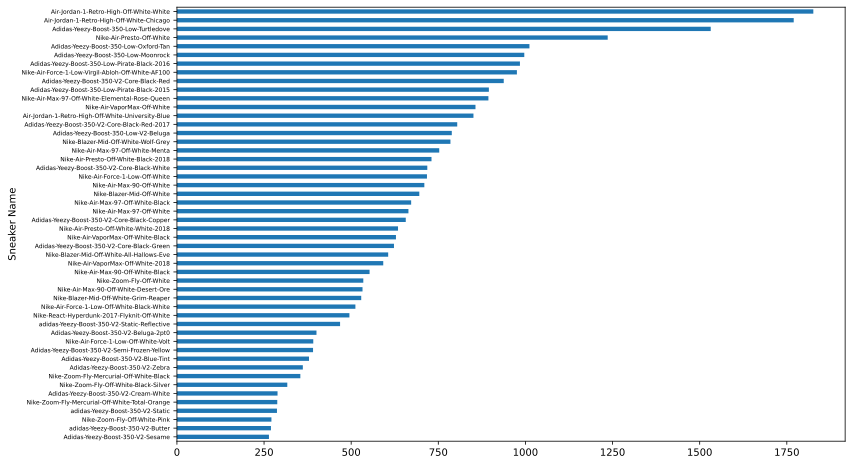

In [12]:
sneaker=df.groupby(['Sneaker Name'])['Sale Price'].mean().sort_values(ascending=False)

fig=plt.figure(figsize=(12, 8))
ax=fig.add_subplot()
sneaker.sort_values().plot(kind='barh', ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)

## How many shoes in the dataset were produced by Nike?

A sneaker with either 'Nike' or 'Jordan' in the name is going to be produced by Nike. 

In [13]:
df[df['Sneaker Name'].str.contains('Nike' or 'Jordan')]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit
128,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,"1,600.00",160,2017-09-09,8.00,California,"1,440.00"
129,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,"1,090.00",160,2017-09-09,11.50,New York,930.00
130,2017-09-07,Off-White,Nike-Air-Presto-Off-White,"1,344.00",160,2017-09-09,10.00,New York,"1,184.00"
131,2017-09-07,Off-White,Nike-Air-Presto-Off-White,"1,325.00",160,2017-09-09,10.00,Massachusetts,"1,165.00"
132,2017-09-07,Off-White,Nike-Air-VaporMax-Off-White,"1,800.00",250,2017-09-09,12.00,Kentucky,"1,550.00"
...,...,...,...,...,...,...,...,...,...
99869,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,265.00,170,2018-11-28,11.00,New York,95.00
99870,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,331.00,170,2018-11-28,4.00,California,161.00
99871,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,405.00,170,2018-11-28,6.00,New York,235.00
99872,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,263.00,170,2018-11-28,10.00,Maryland,93.00


In [14]:
df[df['Sneaker Name'].str.contains('Nike') | df['Sneaker Name'].str.contains('Jordan')]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit
128,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,"1,600.00",160,2017-09-09,8.00,California,"1,440.00"
129,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,"1,090.00",160,2017-09-09,11.50,New York,930.00
130,2017-09-07,Off-White,Nike-Air-Presto-Off-White,"1,344.00",160,2017-09-09,10.00,New York,"1,184.00"
131,2017-09-07,Off-White,Nike-Air-Presto-Off-White,"1,325.00",160,2017-09-09,10.00,Massachusetts,"1,165.00"
132,2017-09-07,Off-White,Nike-Air-VaporMax-Off-White,"1,800.00",250,2017-09-09,12.00,Kentucky,"1,550.00"
...,...,...,...,...,...,...,...,...,...
99869,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,265.00,170,2018-11-28,11.00,New York,95.00
99870,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,331.00,170,2018-11-28,4.00,California,161.00
99871,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,405.00,170,2018-11-28,6.00,New York,235.00
99872,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,263.00,170,2018-11-28,10.00,Maryland,93.00


In [15]:
df[df['Sneaker Name'].str.contains('Nike' or 'Jordan')].shape

(22091, 9)

In [16]:
df[df['Sneaker Name'].str.contains('Nike') | df['Sneaker Name'].str.contains('Jordan')].shape

(27794, 9)

## What are the top 3 months for buying shoes? (This is order date, not release date)

People like to buy shoes for Christmas, or with money they received during Christmas. 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  float64       
 4   Retail Price  99956 non-null  int64         
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
 8   Profit        99956 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 6.9+ MB


In [18]:
df['Order Date'].dt.month.value_counts()

12    22292
11    15489
1     14511
2      7774
7      7434
10     7307
8      6090
6      5431
9      4671
5      3456
4      2756
3      2745
Name: Order Date, dtype: int64

In [19]:
df['Order Date'].dt.month_name().value_counts()

December     22292
November     15489
January      14511
February      7774
July          7434
October       7307
August        6090
June          5431
September     4671
May           3456
April         2756
March         2745
Name: Order Date, dtype: int64

## What month had the most total money spent on the shoes in this dataset?

Not super-month, but rather instead something like May 2017. And If you get weird decimals like `5,068,067.6894`, don't worry, the data is just a little dirty.

In [20]:
df.resample('M', on='Order Date')['Sale Price'].sum().sort_values(ascending=False).head(5)

Order Date
2018-12-31   5,068,067.69
2019-01-31   4,029,846.26
2018-11-30   3,785,401.29
2017-12-31   3,211,053.00
2018-08-31   3,162,458.00
Name: Sale Price, dtype: float64

<AxesSubplot:xlabel='Order Date'>

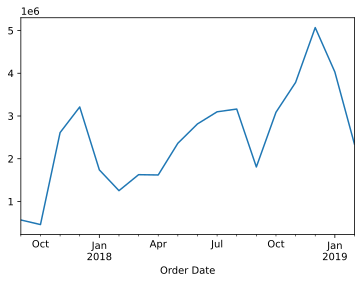

In [21]:
df.resample('M', on='Order Date')['Sale Price'].sum().plot()